In [29]:
import pandas as pd
import numpy as np

import scipy
from scipy import stats
import statsmodels as sm
from statsmodels.regression.linear_model import OLS

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline


from datetime import datetime
import time
import datetime

import eikon as ek
#creds = 'f5a341b614d945b9b93a71fe53348ba119d11e99'
#API Key Lionel: d505f265d9bd4c0cb7df44481ece31a0ad8d1974
#API Key Raphi: f5a341b614d945b9b93a71fe53348ba119d11e99
#API Key Laurin:
ek.set_app_key('f5a341b614d945b9b93a71fe53348ba119d11e99')

GDP nicht nehmen, da nur Quartal / unemployment rate / Inflation (CPI) / purchasing manager index (PMI)

US / Eurozone / CH / China

In [38]:
Makro_Data = ['USUNR=ECI',  #US Unemploymet
              'USCPI=ECI',  #US CPI
              'USPMI=ECI',  #US PMI
              
              'EUUNR=ECI',  #EU Unemployment
              'EUHICY=ECI', #EU CPI
              'EUPMI=ECI',  #EU PMI                NICHT GUT (Nicht vollständig)
              
              'CHJOB=ECI',  #CH Unemployment
              'CHCPIY=ECI', #CH CPI
              'CHPMI=ECI',  #CH PMI
              
            #China is in the Dataset due to its exposure to the Metals

              'CNURUA=ECI', #China Unemployment    NICHT GUT (Nicht vollständig)
              'CNCPI=ECI',   #China CPI
              'CNPMIB=ECI',  #China PMI

            #Russia is in the Dataset due to its exporsure to Oil & Gas

              'RUUNR=ECI',  #Russia Unemployment
              'RUCPIY=ECI', #Russia CPI
              'RUPMIM=ECI', #Russia PMI            NICHT GUT (Nicht vollständig)
             ]  

In [39]:
macro = ek.get_timeseries(Makro_Data,
                          start_date='2012-01-01',
                          end_date='2022-01-01',
                          fields='VALUE',
                          interval='monthly')                      

In [40]:
macro.isnull().sum()

VALUE
USUNR=ECI     0
USCPI=ECI     0
USPMI=ECI     0
EUUNR=ECI     0
EUHICY=ECI    0
CHJOB=ECI     0
CHCPIY=ECI    0
CHPMI=ECI     0
CNCPI=ECI     0
CNPMIB=ECI    0
RUUNR=ECI     0
RUCPIY=ECI    0
dtype: int64

In [42]:
macro.describe()

VALUE,USUNR=ECI,USCPI=ECI,USPMI=ECI,EUUNR=ECI,EUHICY=ECI,CHJOB=ECI,CHCPIY=ECI,CHPMI=ECI,CNCPI=ECI,CNPMIB=ECI,RUUNR=ECI,RUCPIY=ECI
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.00000,120.000000,120.000000,120.000000,120.00000,120.000000,120.000000
mean,5.711667,0.177500,54.350000,9.705000,1.204167,2.96500,-0.084167,54.200000,2.072500,50.51250,5.241667,6.340000
std,1.944662,0.254526,4.152755,1.721922,1.035617,0.34584,0.729452,6.589041,0.983474,1.59698,0.525738,3.622395
min,3.500000,-0.800000,41.600000,7.000000,-0.600000,2.30000,-1.400000,40.700000,-0.500000,35.70000,4.300000,2.200000
25%,4.200000,0.000000,51.250000,8.075000,0.400000,2.80000,-0.600000,49.200000,1.500000,50.10000,4.900000,3.775000
50%,5.150000,0.200000,54.400000,9.700000,1.200000,3.10000,-0.100000,53.700000,2.000000,50.50000,5.200000,5.800000
75%,6.750000,0.300000,57.625000,11.425000,1.900000,3.20000,0.600000,58.300000,2.500000,51.22500,5.600000,7.300000
max,14.700000,0.900000,63.700000,12.200000,5.000000,3.50000,1.500000,70.000000,5.400000,53.30000,6.400000,16.900000


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

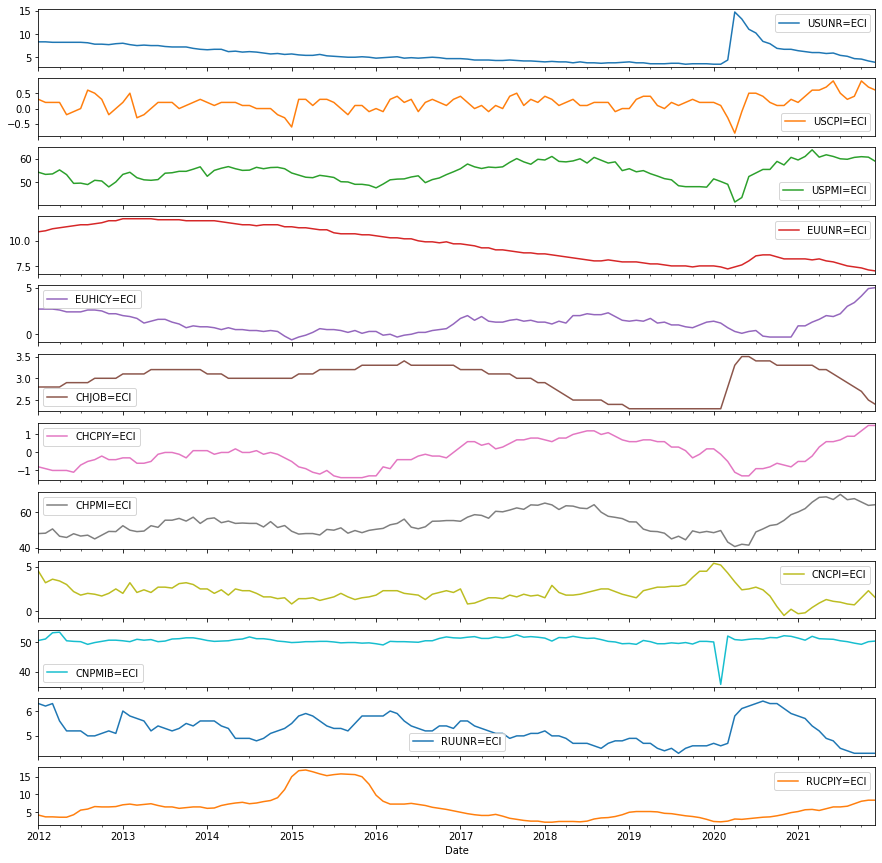

In [45]:
macro.plot(subplots=True, figsize=(15,15))